# Ejercicio Covid-19

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn") 
plt.rcParams["figure.figsize"] = (15, 5)

# Actualizar submodule: git submodule update

In [3]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv" )
data.sample(15)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
46,NaN,Mexico,23.6345,-102.5528,0,0,0,0,0,0,...,7,7,8,12,12,26,41,53,82,93.0
449,Curacao,Netherlands,12.1696,-68.9900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,3,3.0
360,"Pinellas, FL",US,27.8764,-82.7779,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
162,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990.0
234,"Spotsylvania, VA",US,38.2042,-77.6078,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
111,Pennsylvania,US,40.5908,-77.2098,0,0,0,0,0,0,...,0,12,16,22,41,47,66,77,112,152.0
144,Idaho,US,44.2405,-114.4788,0,0,0,0,0,0,...,0,0,0,0,1,2,5,5,8,9.0
455,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,1,1,5,6,7,9,9,0.0
86,NaN,Malta,35.9375,14.3754,0,0,0,0,0,0,...,3,5,6,6,12,18,21,30,38,38.0
435,NaN,Kosovo,42.6026,20.9030,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,2.0


In [4]:
# Países diferentes
data['Country/Region'].nunique()

163

In [5]:
#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]
#Filtrar por los que tienen más datos
data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_countries.shape

(16, 60)

In [6]:
data_aus = data[data['Country/Region'] == 'Australia']
data_aus.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,48,55,65,65,92,112,134,171,210,267.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,15,18,21,21,36,49,57,71,94,121.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,18,20,20,35,46,61,68,78,94.0
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,7,7,9,9,16,19,20,29,29,37.0
22,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,4,6,9,9,14,17,17,28,31,35.0
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,2,2,3,3,5,5,6,7,7,10.0
71,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1.0
402,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,2,3.0


In [7]:
#Hago transposición de los datos
data_trans = data_countries.set_index('Country/Region').transpose()
#Me quedo sólo con los datos temporables
data_time = data_trans[2:]
data_time.head()

Country/Region,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
1/22/20,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1/23/20,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1/24/20,0.0,0.0,920.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/25/20,0.0,0.0,1406.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/26/20,0.0,0.0,2075.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [8]:
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.head()

Country/Region,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
2020-01-22,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-23,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-24,0.0,0.0,920.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,1406.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-26,0.0,0.0,2075.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [9]:
# Exportar CSV
data_time.to_csv(r'covid19-csv.csv', index = True)

In [10]:
# Filtrar sin China y último mes
data_time_filter = data_time[-30:]
data_time_filter = data_time_filter.drop('China', axis=1)
data_time_filter.head(30)

Country/Region,Austria,Belgium,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
2020-02-18,0.0,1.0,0.0,12.0,16.0,0.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-19,0.0,1.0,0.0,12.0,16.0,2.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-20,0.0,1.0,0.0,12.0,16.0,5.0,3.0,104.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-21,0.0,1.0,0.0,12.0,16.0,18.0,20.0,204.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-22,0.0,1.0,0.0,12.0,16.0,28.0,62.0,433.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-23,0.0,1.0,0.0,12.0,16.0,43.0,155.0,602.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-24,0.0,1.0,0.0,12.0,16.0,61.0,229.0,833.0,0.0,0.0,2.0,1.0,0.0,51.0,13.0
2020-02-25,2.0,1.0,0.0,14.0,17.0,95.0,322.0,977.0,0.0,0.0,6.0,1.0,1.0,51.0,13.0
2020-02-26,2.0,1.0,0.0,18.0,27.0,139.0,453.0,1261.0,0.0,1.0,13.0,2.0,1.0,57.0,13.0
2020-02-27,3.0,1.0,1.0,38.0,46.0,245.0,655.0,1766.0,1.0,1.0,15.0,7.0,8.0,58.0,15.0


In [464]:
# Exportar CSV independientes para cada país
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 50]
    dataX.to_csv('data_' + country + ".csv", index=False)


In [364]:
pd.isnull(data_time_most).any().count()

152

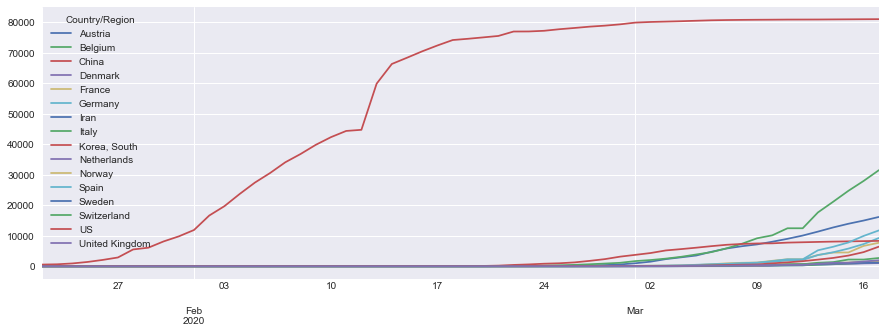

In [365]:
data_time.plot()
plt.show()

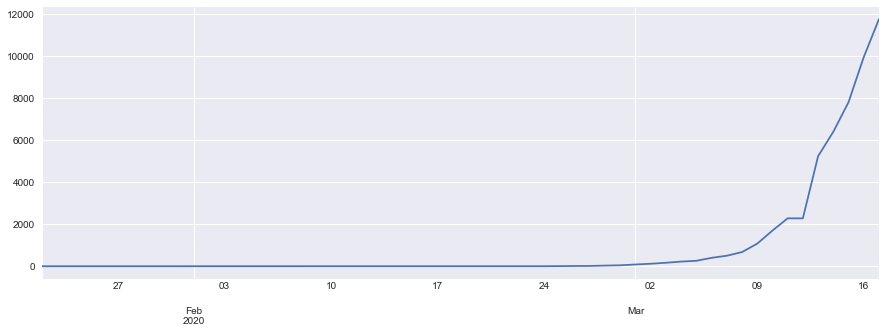

In [366]:
data_time_spain = data_time['Spain']
data_time_spain.shape
data_time_spain.plot()
plt.show()

## Modelado de AR

In [367]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_time_spain, order = (2, 0, 0)).fit() 

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [368]:
prediction = model.get_forecast(steps = 12)

In [369]:
prediction.conf_int().head()

,lower Spain,upper Spain
2020-03-18,12042.527967,13854.387740
2020-03-19,11934.537739,15500.931338
2020-03-20,11524.015048,16836.909587
2020-03-21,10936.958034,17914.478768
2020-03-22,10251.730359,18782.587668


In [370]:
prediction.predicted_mean.head()

2020-03-18    12948.457854
2020-03-19    13717.734538
2020-03-20    14180.462318
2020-03-21    14425.718401
2020-03-22    14517.159014
Freq: D, dtype: float64

In [371]:
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

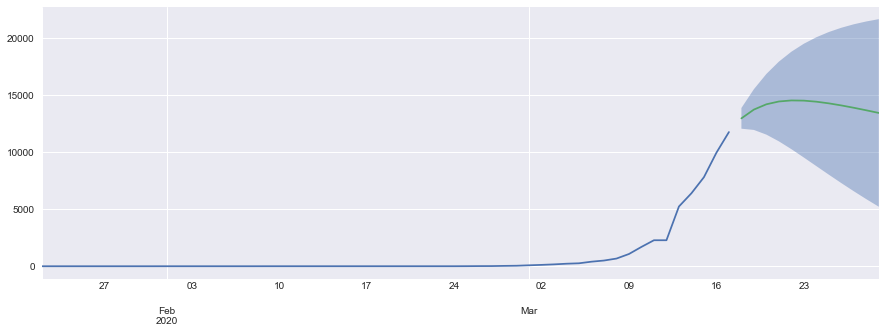

In [372]:
fig, ax = plt.subplots()
data_time_spain.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [373]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_time.Spain)

(3.410951690700507,
 1.0,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 507.2925170512722)

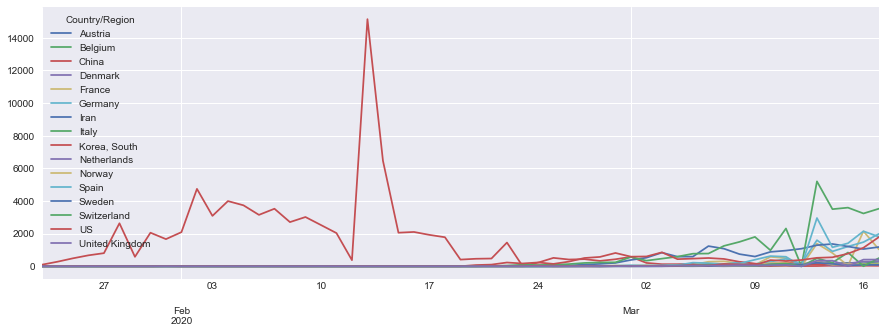

In [374]:
data_diff = data_time - data_time.shift(1)
data_diff.dropna(inplace = True)
data_diff.plot();

In [375]:
adfuller(data_diff.Spain)

(4.397045159343214,
 1.0,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 500.7439543949986)

## Modelo SARIMA

In [376]:
model = SARIMAX(data_time.Spain, order = (3, 1, 2), seasonal_order = (1, 1, 2, 12)).fit()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [377]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

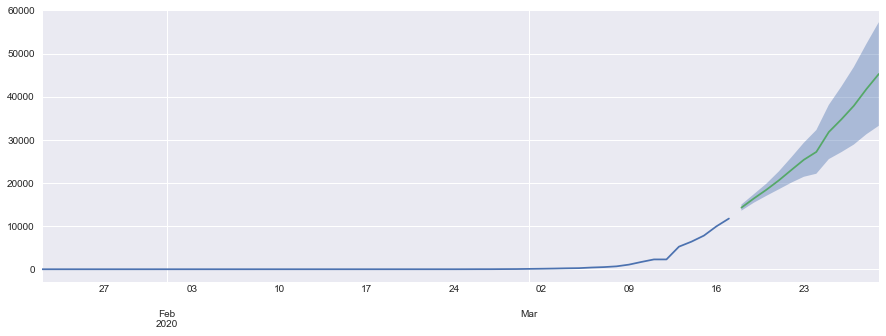

In [378]:
data_time.Spain.plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [379]:
model.resid.head()

2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
dtype: float64

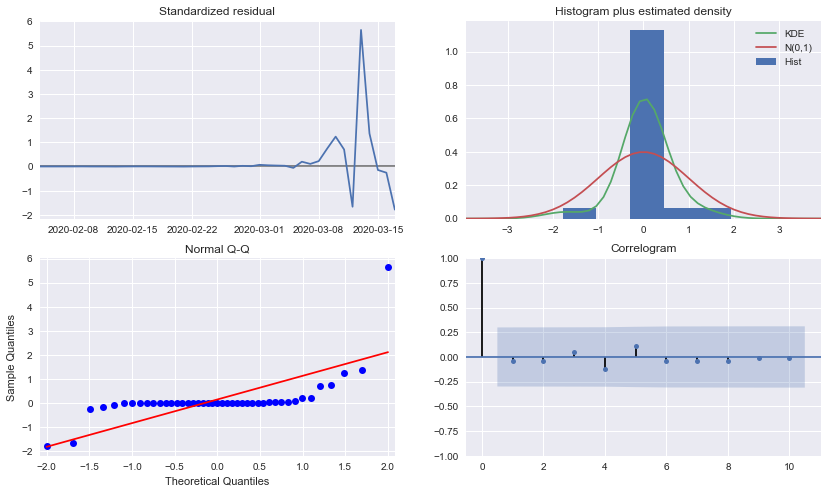

In [380]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()